In [1]:
import os
import xml.etree.ElementTree as et
import re
from collections import Counter
import pandas as pd

In [2]:
dir = 'Annotations'

modality_types = ['text-flow','static-image','dynamic-image-flow','dynamic-text']
navigation_types = ['scroll','button']
rows = []

for xml_file in os.listdir(dir):
    
    if re.search( r'xml$' , xml_file ):
        data = dict()
        modalities = []
        navigation = []
        
        try:
            path = os.path.join(dir,xml_file)
            annotation = et.parse(path) 
            article = annotation.getroot() 
            year = article.attrib['year']
            screens = article.findall('screen')

            for screen in article: 
                modality = screen.attrib['mode']
                if modality in modality_types:
                    modalities.append(modality)
                if modality in navigation_types:
                    navigation.append(modality)

            modalities_freq = Counter(modalities)
            navigation_freq = Counter(navigation)

            for m in modality_types:
                data[m] = modalities_freq.get(m,0)
            for n in navigation_types:
                data[n] = navigation_freq.get(n,0)

            data['year'] = year
            rows.append(data)
        
        except:
            print(f'Problem for {xml_file}')

df = pd.DataFrame(rows,columns= ['year']+modality_types+navigation_types)

Problem for results-president.xml?map_type=change-arrows&geography_type=counties.xml
Problem for coronavirus-trump-reopen-america.xml?action=click&module=Opinion&pgtype=Homepage.xml
Problem for covid-19-vaccine-timeline.xml?action=click&module=Opinion&pgtype=Homepage.xml


In [3]:
print(f"Data about {df.shape[0]} articles.")
print(f"Columns: {df.columns.to_list()}")

Data about 952 articles.
Columns: ['year', 'text-flow', 'static-image', 'dynamic-image-flow', 'dynamic-text', 'scroll', 'button']


The cell below groups all the data by year. 

In [4]:
rows = []

years = list(df['year'].unique())
years.remove('2023')

for year in sorted(years):
    row = []
    row.append(year)
    print(year)
    total_modality = 0 
    total_navigation = 0 
    df_year = df.query( "year== '{}' ".format(year) )
    for m in modality_types:
        row.append(df_year[m].sum())
        total_modality += df_year[m].sum()
    for n in navigation_types:
        row.append(df_year[n].sum())
        total_navigation += df_year[n].sum()
    row.append(total_modality)
    row.append(total_navigation)
    row.append(df_year.shape[0])
    rows.append(row)
    
columns= ['year']+ modality_types + navigation_types + ['total_modalities','total_navigation','nr_articles']   
df_modalities = pd.DataFrame(rows, columns=columns )

2014
2015
2016
2017
2018
2019
2020
2021
2022


In [5]:
df_modalities.head()

,year,text-flow,static-image,dynamic-image-flow,dynamic-text,scroll,button,total_modalities,total_navigation,nr_articles
0,2014,1236,312,123,356,2,465,2027,467,104
1,2015,979,278,105,0,6,206,1362,212,82
2,2016,1716,540,102,2,6,163,2360,169,74
3,2017,1765,2125,137,51,0,118,4078,118,109
4,2018,2573,1116,222,86,2,104,3997,106,113


In [6]:
for m in modality_types:
    column_name = m + '_percentage'
    df_modalities[column_name] = df_modalities[m] / df_modalities['total_modalities']
    
for m in modality_types:
    column_name = m + '_per_article'
    df_modalities[column_name] = df_modalities[m] / df_modalities['nr_articles']
    
for m in navigation_types:
    column_name = m + '_percentage'
    df_modalities[column_name] = df_modalities[m] / df_modalities['total_modalities']
    
for m in navigation_types:
    column_name = m + '_per_article'
    df_modalities[column_name] = df_modalities[m] / df_modalities['nr_articles']

In [7]:
df_modalities.to_csv('modalities_per_year.csv')
print(df_modalities.columns)

Index(['year', 'text-flow', 'static-image', 'dynamic-image-flow',
       'dynamic-text', 'scroll', 'button', 'total_modalities',
       'total_navigation', 'nr_articles', 'text-flow_percentage',
       'static-image_percentage', 'dynamic-image-flow_percentage',
       'dynamic-text_percentage', 'text-flow_per_article',
       'static-image_per_article', 'dynamic-image-flow_per_article',
       'dynamic-text_per_article', 'scroll_percentage', 'button_percentage',
       'scroll_per_article', 'button_per_article'],
      dtype='object')


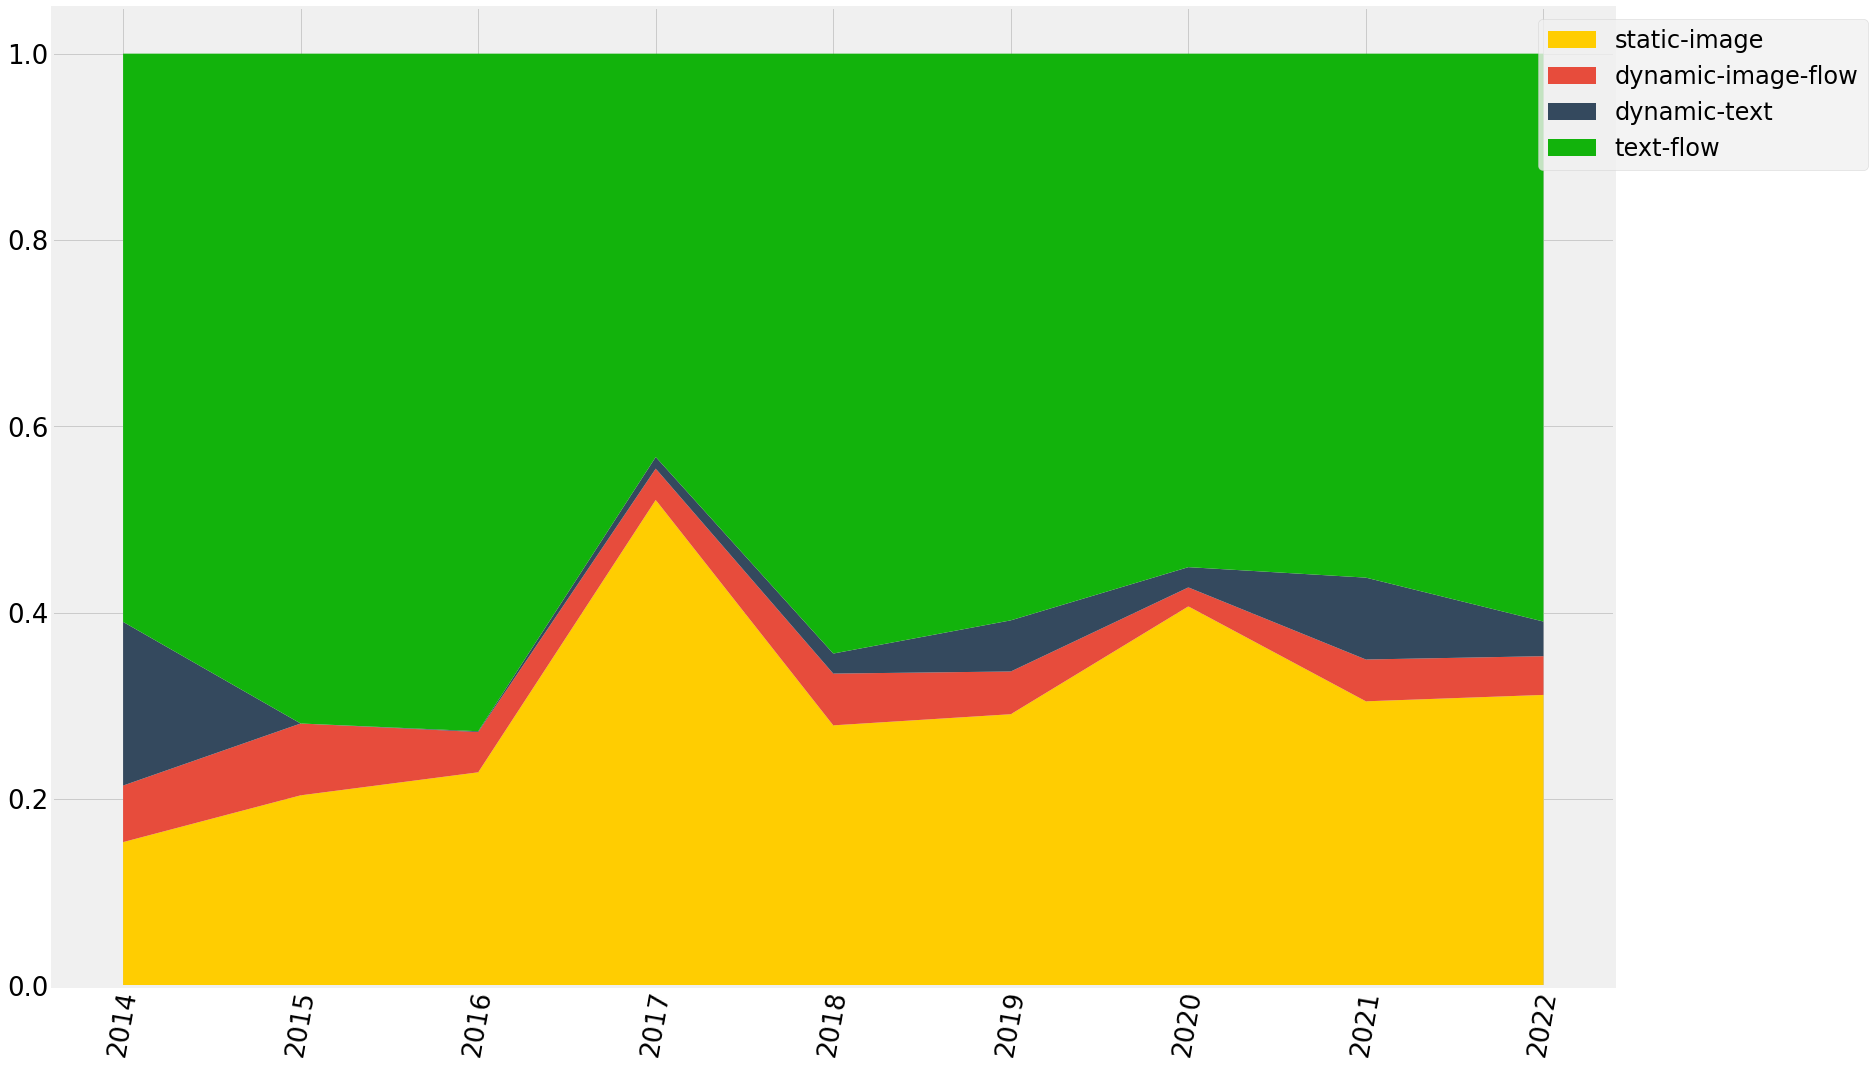

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure( figsize = (28,18) )
plt.style.use('fivethirtyeight')

# reset the plot configurations to default
color_map = ["FFCD01", "#e74c3c","#34495e", "#12b30c", "#0099AA","#FFAA88", "#19d138", "#9b59b6"]


plt.stackplot( df_modalities['year'] , 

    df_modalities['static-image_percentage'],
        df_modalities['dynamic-image-flow_percentage'],
        df_modalities['dynamic-text_percentage'] , 
                 df_modalities['text-flow_percentage'], labels = [ 'static-image', 'dynamic-image-flow','dynamic-text', 'text-flow'] , colors = color_map  )

plt.legend( loc='upper right' , prop={ 'size':24} , bbox_to_anchor=(1.17, 1.0) )


#add axis labels


plt.xticks(rotation= 80 , fontsize= 26)
plt.yticks(fontsize= 26)

plt.show()

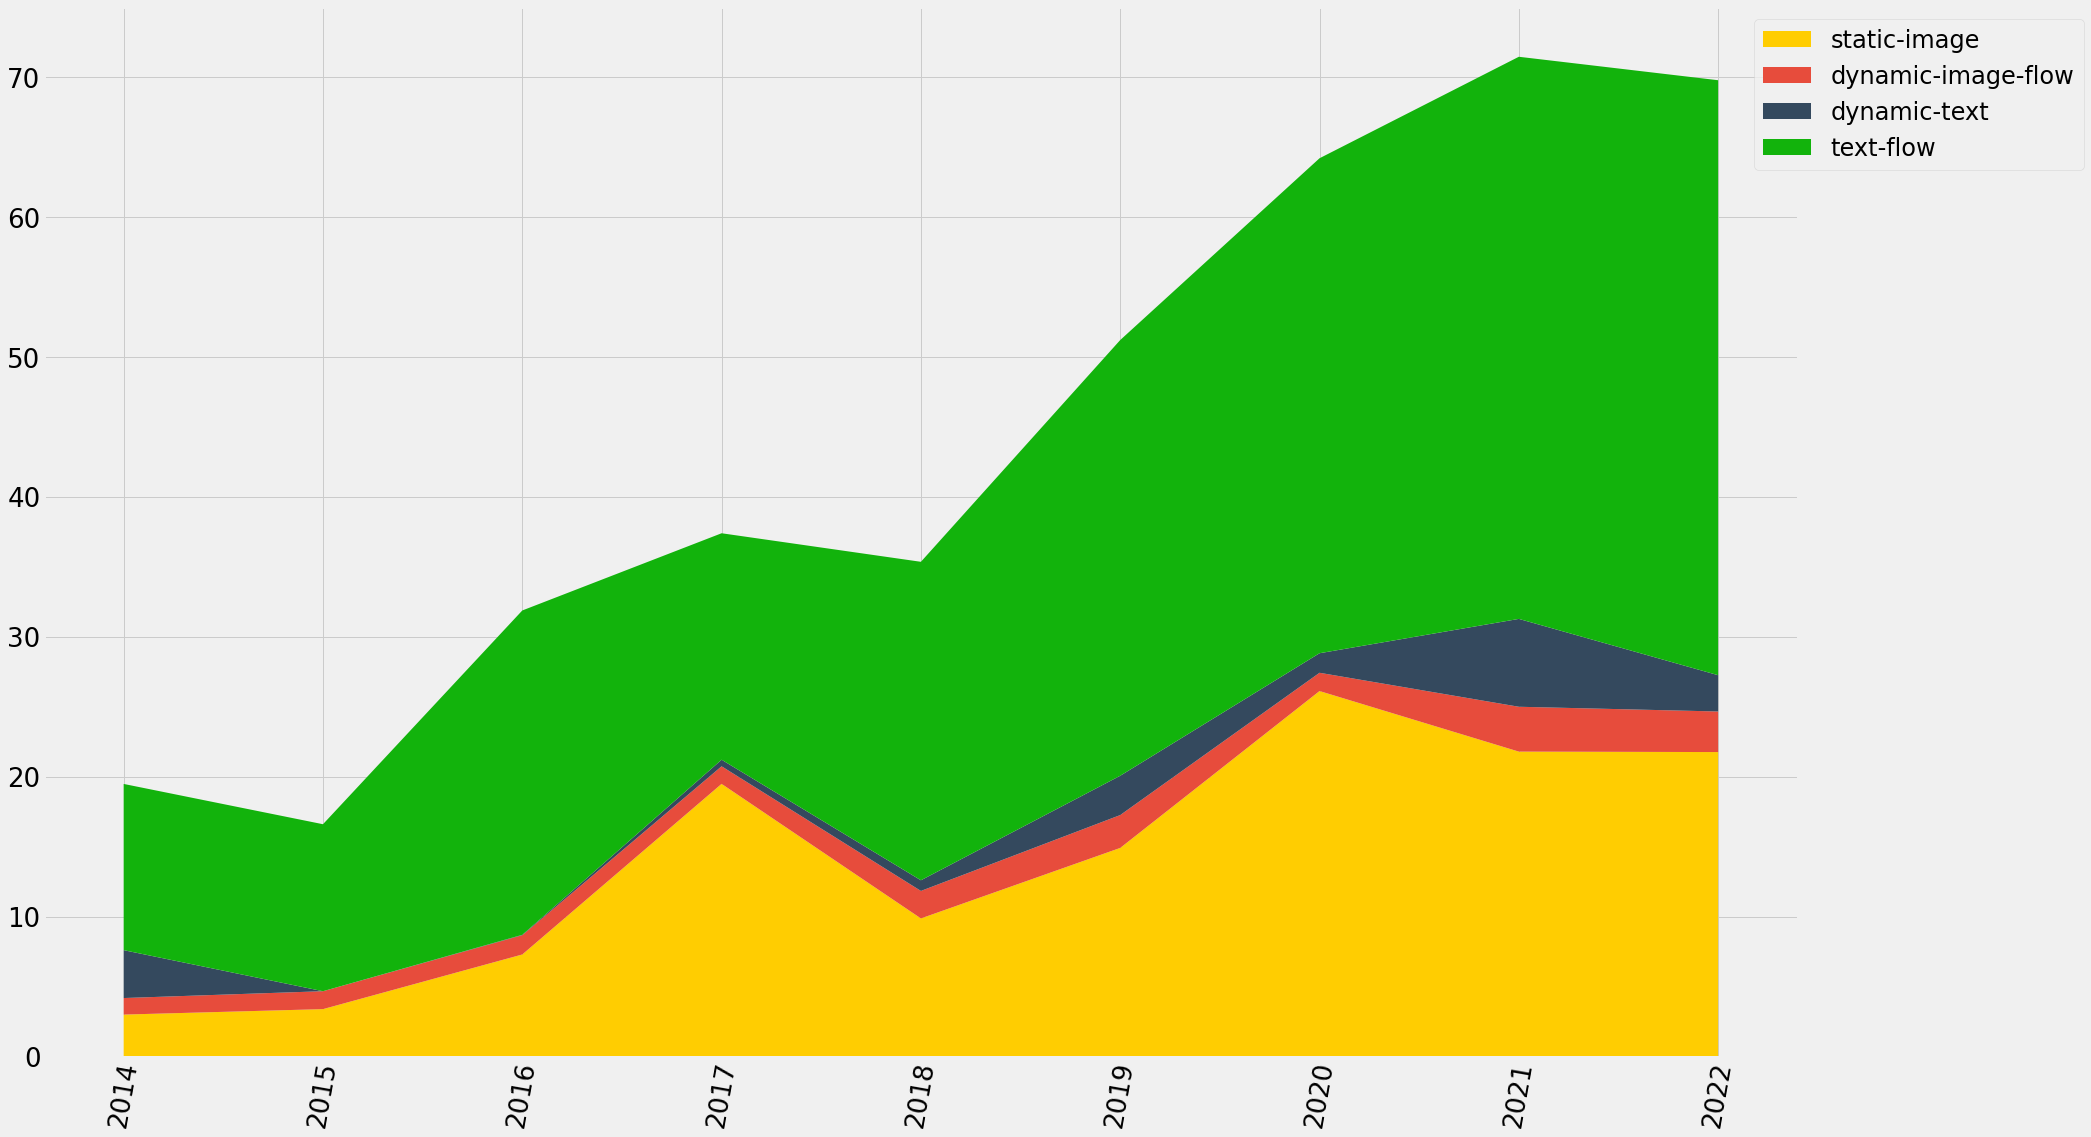

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure( figsize = (28,18) )
plt.style.use('fivethirtyeight')

# reset the plot configurations to default
color_map = ["FFCD01", "#e74c3c","#34495e", "#12b30c", "#0099AA","#FFAA88", "#19d138", "#9b59b6"]


plt.stackplot( df_modalities['year'] , 

    df_modalities['static-image_per_article'],
        df_modalities['dynamic-image-flow_per_article'],
        df_modalities['dynamic-text_per_article'] , 
                 df_modalities['text-flow_per_article'], labels = [ 'static-image', 'dynamic-image-flow','dynamic-text', 'text-flow'] , colors = color_map  )

plt.legend( loc='upper right' , prop={ 'size':24} , bbox_to_anchor=(1.17, 1.0) )


#add axis labels


plt.xticks(rotation= 80 , fontsize= 26)
plt.yticks(fontsize= 26)

plt.show()

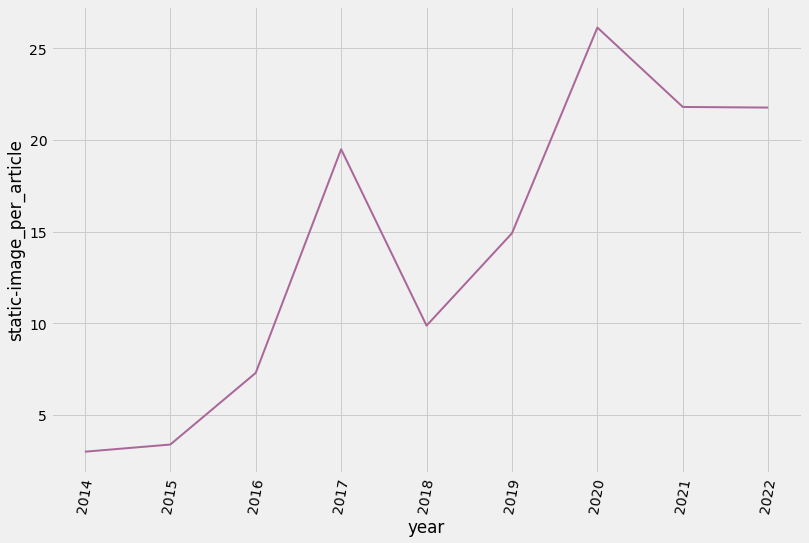

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure( figsize = ( 12, 8))
ax = sns.lineplot(data=df_modalities, x="year", y="static-image_per_article", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

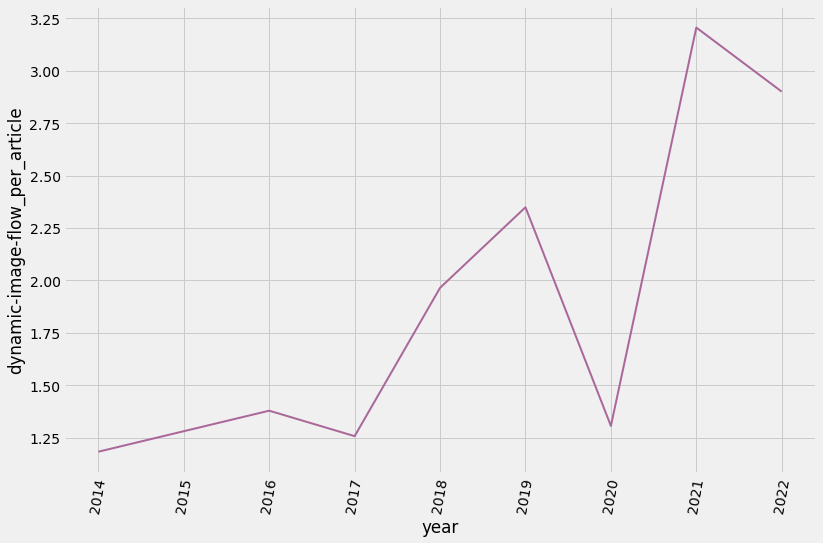

In [10]:

fig = plt.figure( figsize = ( 12, 8))
ax = sns.lineplot(data=df_modalities, x="year", y="dynamic-image-flow_per_article", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

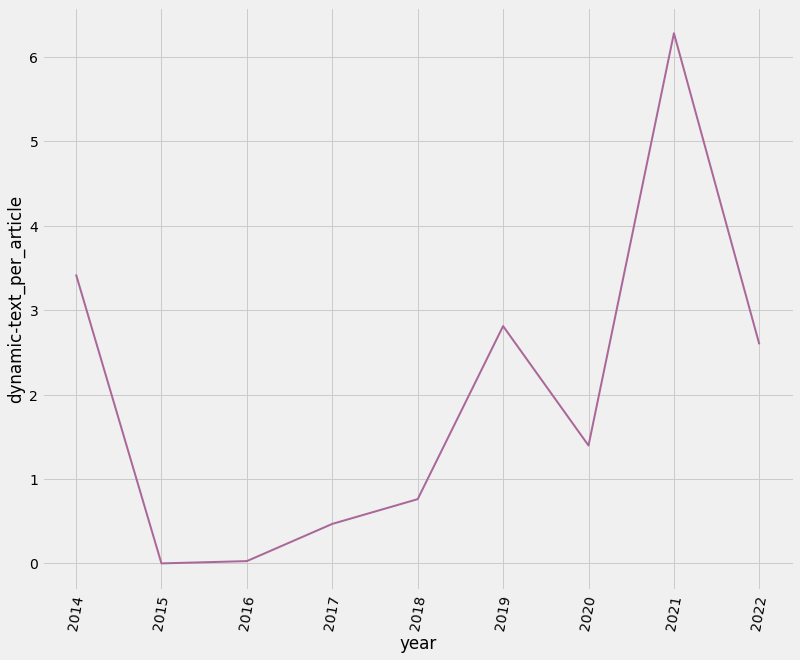

In [11]:

fig = plt.figure( figsize = ( 12, 10))
ax = sns.lineplot(data=df_modalities, x="year", y="dynamic-text_per_article", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

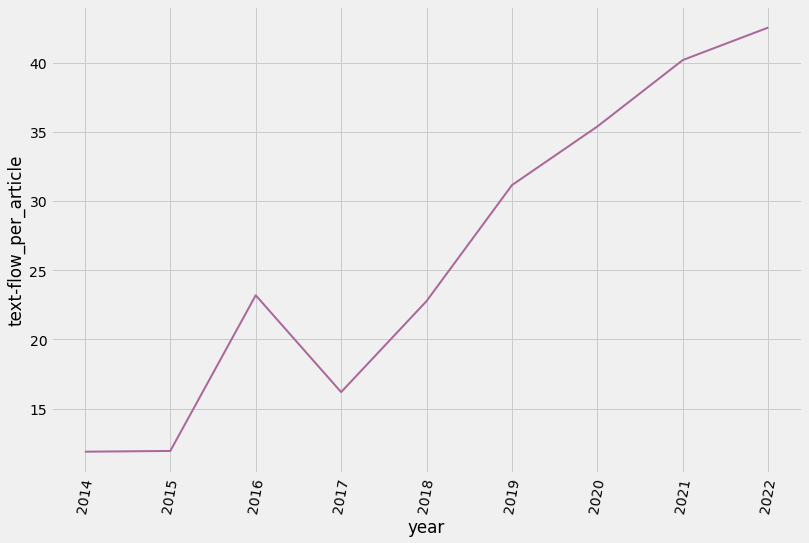

In [12]:

fig = plt.figure( figsize = ( 12, 8))
ax = sns.lineplot(data=df_modalities, x="year", y="text-flow_per_article", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

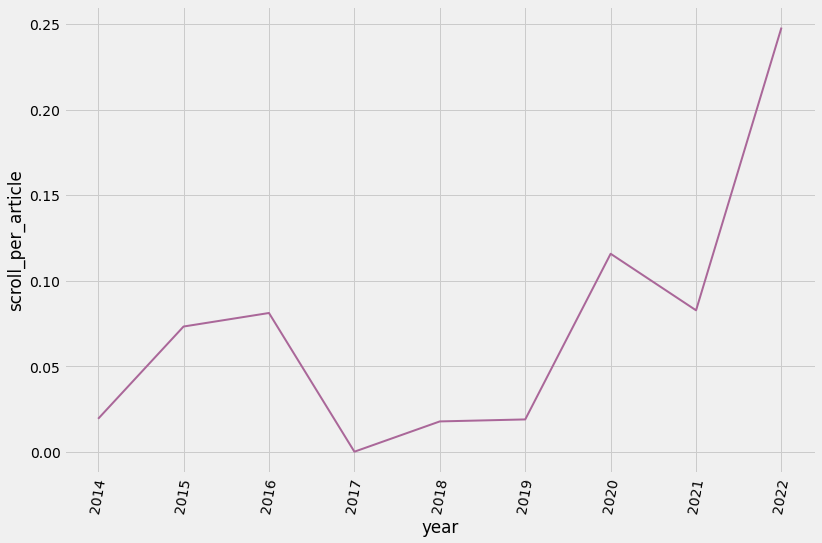

In [13]:

fig = plt.figure( figsize = ( 12, 8))
ax = sns.lineplot(data=df_modalities, x="year", y="scroll_per_article", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

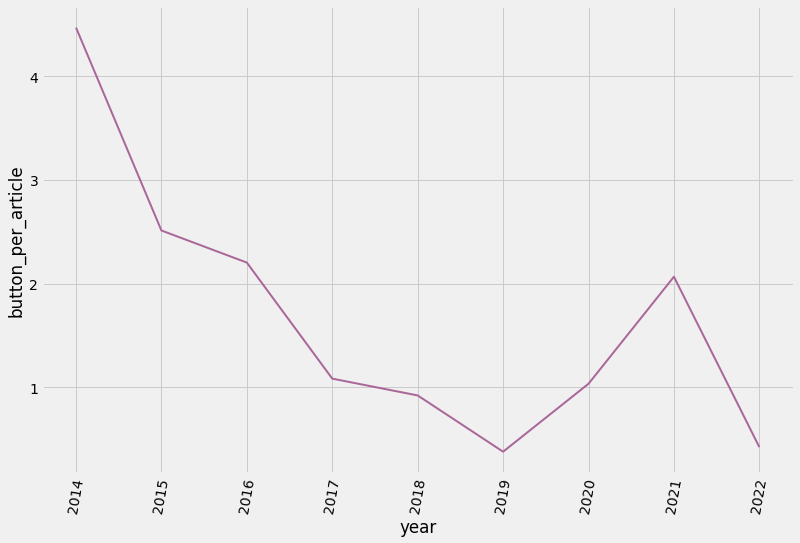

In [14]:

fig = plt.figure( figsize = ( 12, 8))
ax = sns.lineplot(data=df_modalities, x="year", y="button_per_article", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()